In [1]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings(): 
    # You should probably not use this dataset.
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)
# print(X.shape)
# print(y.shape)
# print(X.dtype)
# print(y.dtype)
# print(y)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.notebook import tqdm

C:\Users\13755\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import random
# Set random seeds
torch.manual_seed(2)
np.random.seed(2)
random.seed(2)

In [4]:
# hyperparameters
batch_size = 4
epochs = 100
step_num_mlp = 0
step_num_hmlp = 0

total_sample = 506
train_sample = 404

In [5]:
def get_angle(points):
    return torch.tensor([np.arctan(pos[1]/pos[0]) for pos in points])

In [6]:
# to tensor, and only select # numnber of rooms and LSTAT as input X
X = torch.tensor(X[:, [5, 12]]).float()
y = np.float32(y.reshape((total_sample, 1)))

In [7]:
data_loader = torch.utils.data.DataLoader(
    list(zip(X, y))[:train_sample], batch_size=batch_size, shuffle=True, drop_last=True
)

test_loader = torch.utils.data.DataLoader(
    list(zip(X, y))[train_sample:], batch_size=batch_size, shuffle=True, drop_last=True
)

In [8]:

def gen_heatmap(_model, x1_num=100, x2_num=100, name='model'):
    pred = []
    for i in range(x1_num):
        temp_history = []
        for j in range(x2_num):

            if name == 'Hybrid MLP':
                x1 = np.pi/2 * i/x1_num
                x2 = np.pi/2 * j/x2_num
            else:
                x1 = i/x1_num * 5 + 4
                x2 = j/x2_num  * 40
            y_pred = _model(torch.tensor([x1, x2], dtype=torch.float32))

            prediction = y_pred.detach().item()

            temp_history.append(prediction)
        pred.append(temp_history)

    # make the plot more intuitive
    # horizon direction: LSTAT
    # vertical direction: number of room
    pred = list(reversed(pred))
    
    plt.xticks([])
    plt.yticks([])

    plt.xlabel('LSTAT')
    plt.ylabel('# room')
    plt.title(name)
    # plt.title(name).set_color("white")

    im = plt.imshow(pred, vmin=5, vmax=45, cmap=plt.cm.get_cmap('ocean'))
    # im = plt.imshow(pred, vmin=11, vmax=49, cmap=plt.cm.get_cmap('ocean'))
    plt.rcParams['axes.grid'] = False
    # this stop the warning
    plt.colorbar(im)
    
    plt.title(name)
    
    plt.show()
    
    # return heatmap
    return pred
    
# gen_heatmap(model)
# gen_heatmap(h_model)

In [9]:
eval_loss_history = []
h_eval_loss_history = []
train_loss_history = []
h_train_loss_history = []


loss_eval = torch.nn.L1Loss()

# use L1 loss
def eval_model(_model, _data_loader=data_loader, epoch_num=-1, scale=1., history_list=None, store_history=True):
    _loss = 0
    for xs, ys in _data_loader:
        pred = _model(xs * scale)
        _loss += loss_eval(pred, ys).detach()
        
    avg_loss = _loss
    if store_history:
        history_list.append(avg_loss)
    print(f"(eval) Epoch {epoch_num}'s' avg loss: {avg_loss:.2f}")

Multi layer perceptron
=======================================

![title](img/regression_mlp.png)

torch.Size([4, 2])
torch.float32
Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True)


torch.Size([4])
torch.float32
Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True)


torch.Size([16, 4])
torch.float32
Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073],
        [ 0.2116, -0.2950, -0.1922,  0.4809],
        [-0.4897, -0.0340, -0.0396,  0.3547],
        [-0.0475,  0.1317, -0.0240, -0.2800],
        [-0.2834, -0.2429, -0.4542, -0.3245],
        [ 0.1177,  0.3291,  0.0246, -0.2292],
        [ 0.2197, -0.1919, -0.1108, -0.2741],
        [-0.1570, -0.4633,  0.2133,  0.1944],
        [ 0.0993,  0.2455,  0.2119,  0.0221],
        [ 0.0530,  0.0382,  0.2668,  0.3359],
        [ 0.3591,  0.2898, -0.1219, -0.0223],
        [-0.1016,  0.2909,  0.0555,  0.4628],
        [ 0.2536, -0.4273,  0.1463,  0.4804],
        [ 0.4441, -0.0079,  0.1659, -

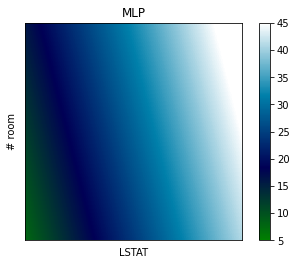

(eval) Epoch 1's' avg loss: 277.65
(eval) Epoch 1's' avg loss: 1015.18
(eval) Epoch 2's' avg loss: 225.85
(eval) Epoch 2's' avg loss: 742.86
(eval) Epoch 3's' avg loss: 146.71
(eval) Epoch 3's' avg loss: 468.18
(eval) Epoch 4's' avg loss: 117.24
(eval) Epoch 4's' avg loss: 396.44
(eval) Epoch 5's' avg loss: 92.32
(eval) Epoch 5's' avg loss: 367.71
(training) Epoch 6's' avg loss: 2741.00


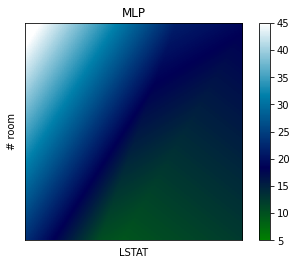

(eval) Epoch 6's' avg loss: 96.30
(eval) Epoch 6's' avg loss: 381.99
(eval) Epoch 7's' avg loss: 84.17
(eval) Epoch 7's' avg loss: 366.16
(eval) Epoch 8's' avg loss: 103.58
(eval) Epoch 8's' avg loss: 404.08
(eval) Epoch 9's' avg loss: 92.12
(eval) Epoch 9's' avg loss: 370.24
(eval) Epoch 10's' avg loss: 93.40
(eval) Epoch 10's' avg loss: 363.88
(training) Epoch 11's' avg loss: 2663.12


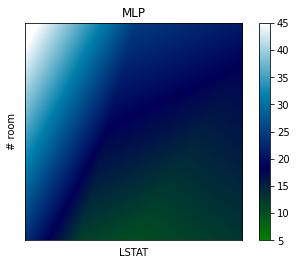

(eval) Epoch 11's' avg loss: 97.63
(eval) Epoch 11's' avg loss: 360.47
(eval) Epoch 12's' avg loss: 103.67
(eval) Epoch 12's' avg loss: 369.77
(eval) Epoch 13's' avg loss: 101.51
(eval) Epoch 13's' avg loss: 359.48
(eval) Epoch 14's' avg loss: 116.68
(eval) Epoch 14's' avg loss: 380.46
(eval) Epoch 15's' avg loss: 92.03
(eval) Epoch 15's' avg loss: 359.92
(training) Epoch 16's' avg loss: 2580.11


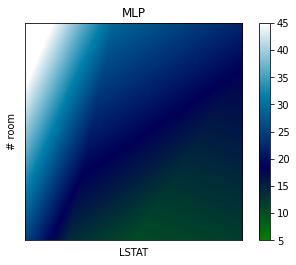

(eval) Epoch 16's' avg loss: 111.94
(eval) Epoch 16's' avg loss: 363.45
(eval) Epoch 17's' avg loss: 102.50
(eval) Epoch 17's' avg loss: 358.01
(eval) Epoch 18's' avg loss: 108.57
(eval) Epoch 18's' avg loss: 352.91
(eval) Epoch 19's' avg loss: 98.63
(eval) Epoch 19's' avg loss: 348.87
(eval) Epoch 20's' avg loss: 89.22
(eval) Epoch 20's' avg loss: 344.00
(training) Epoch 21's' avg loss: 2470.58


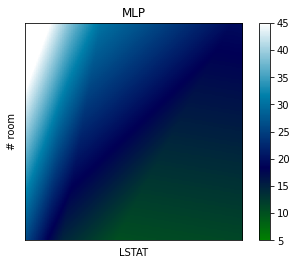

(eval) Epoch 21's' avg loss: 99.29
(eval) Epoch 21's' avg loss: 338.95
(eval) Epoch 22's' avg loss: 98.55
(eval) Epoch 22's' avg loss: 343.64
(eval) Epoch 23's' avg loss: 88.15
(eval) Epoch 23's' avg loss: 338.41
(eval) Epoch 24's' avg loss: 92.70
(eval) Epoch 24's' avg loss: 335.81
(eval) Epoch 25's' avg loss: 104.51
(eval) Epoch 25's' avg loss: 343.36
(training) Epoch 26's' avg loss: 2393.38


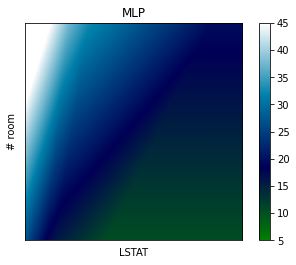

(eval) Epoch 26's' avg loss: 92.19
(eval) Epoch 26's' avg loss: 330.55
(eval) Epoch 27's' avg loss: 96.42
(eval) Epoch 27's' avg loss: 338.03
(eval) Epoch 28's' avg loss: 98.09
(eval) Epoch 28's' avg loss: 335.16
(eval) Epoch 29's' avg loss: 95.23
(eval) Epoch 29's' avg loss: 329.81
(eval) Epoch 30's' avg loss: 86.88
(eval) Epoch 30's' avg loss: 329.75
(training) Epoch 31's' avg loss: 2382.23


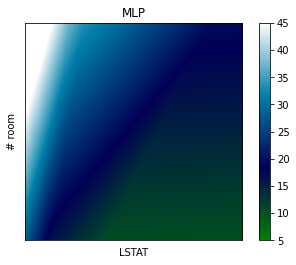

(eval) Epoch 31's' avg loss: 93.88
(eval) Epoch 31's' avg loss: 328.52
(eval) Epoch 32's' avg loss: 93.31
(eval) Epoch 32's' avg loss: 328.35
(eval) Epoch 33's' avg loss: 85.84
(eval) Epoch 33's' avg loss: 336.14
(eval) Epoch 34's' avg loss: 103.26
(eval) Epoch 34's' avg loss: 343.34
(eval) Epoch 35's' avg loss: 111.12
(eval) Epoch 35's' avg loss: 366.75
(training) Epoch 36's' avg loss: 2345.18


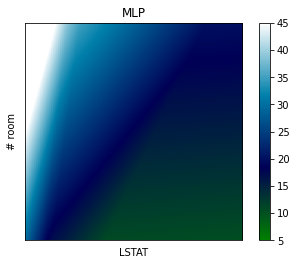

(eval) Epoch 36's' avg loss: 98.36
(eval) Epoch 36's' avg loss: 339.55
(eval) Epoch 37's' avg loss: 88.71
(eval) Epoch 37's' avg loss: 326.88
(eval) Epoch 38's' avg loss: 101.22
(eval) Epoch 38's' avg loss: 345.24
(eval) Epoch 39's' avg loss: 86.35
(eval) Epoch 39's' avg loss: 331.58
(eval) Epoch 40's' avg loss: 102.47
(eval) Epoch 40's' avg loss: 340.54
(training) Epoch 41's' avg loss: 2310.96


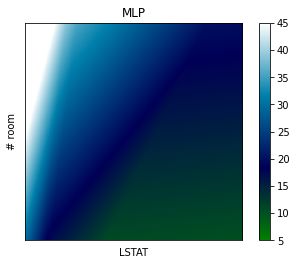

(eval) Epoch 41's' avg loss: 100.16
(eval) Epoch 41's' avg loss: 339.13
(eval) Epoch 42's' avg loss: 96.80
(eval) Epoch 42's' avg loss: 329.79
(eval) Epoch 43's' avg loss: 91.00
(eval) Epoch 43's' avg loss: 327.69
(eval) Epoch 44's' avg loss: 91.40
(eval) Epoch 44's' avg loss: 324.94
(eval) Epoch 45's' avg loss: 94.81
(eval) Epoch 45's' avg loss: 331.37
(training) Epoch 46's' avg loss: 2367.12


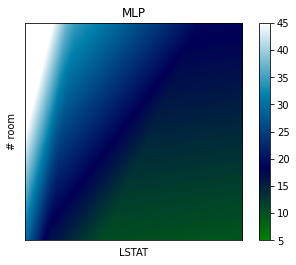

(eval) Epoch 46's' avg loss: 88.95
(eval) Epoch 46's' avg loss: 325.63
(eval) Epoch 47's' avg loss: 92.60
(eval) Epoch 47's' avg loss: 326.73
(eval) Epoch 48's' avg loss: 98.67
(eval) Epoch 48's' avg loss: 332.65
(eval) Epoch 49's' avg loss: 96.49
(eval) Epoch 49's' avg loss: 332.02
(eval) Epoch 50's' avg loss: 95.59
(eval) Epoch 50's' avg loss: 328.11
(training) Epoch 51's' avg loss: 2348.66


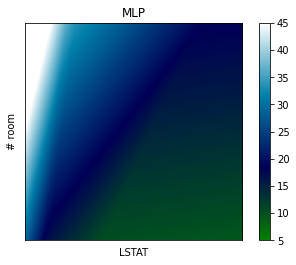

(eval) Epoch 51's' avg loss: 85.86
(eval) Epoch 51's' avg loss: 326.82
(eval) Epoch 52's' avg loss: 96.47
(eval) Epoch 52's' avg loss: 329.37
(eval) Epoch 53's' avg loss: 98.96
(eval) Epoch 53's' avg loss: 338.90
(eval) Epoch 54's' avg loss: 101.26
(eval) Epoch 54's' avg loss: 339.63
(eval) Epoch 55's' avg loss: 84.12
(eval) Epoch 55's' avg loss: 336.55
(training) Epoch 56's' avg loss: 2333.06


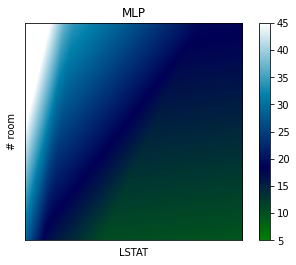

(eval) Epoch 56's' avg loss: 89.55
(eval) Epoch 56's' avg loss: 326.04
(eval) Epoch 57's' avg loss: 98.35
(eval) Epoch 57's' avg loss: 333.53
(eval) Epoch 58's' avg loss: 91.35
(eval) Epoch 58's' avg loss: 325.09
(eval) Epoch 59's' avg loss: 91.71
(eval) Epoch 59's' avg loss: 325.98
(eval) Epoch 60's' avg loss: 100.41
(eval) Epoch 60's' avg loss: 336.19
(training) Epoch 61's' avg loss: 2332.17


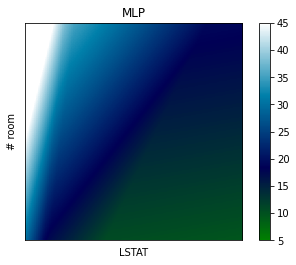

(eval) Epoch 61's' avg loss: 94.50
(eval) Epoch 61's' avg loss: 329.13
(eval) Epoch 62's' avg loss: 87.91
(eval) Epoch 62's' avg loss: 326.35
(eval) Epoch 63's' avg loss: 89.78
(eval) Epoch 63's' avg loss: 324.77
(eval) Epoch 64's' avg loss: 97.52
(eval) Epoch 64's' avg loss: 342.25
(eval) Epoch 65's' avg loss: 88.32
(eval) Epoch 65's' avg loss: 325.90
(training) Epoch 66's' avg loss: 2349.61


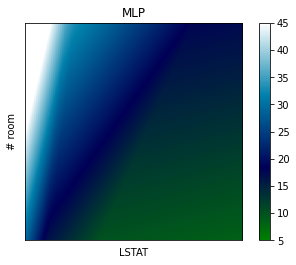

(eval) Epoch 66's' avg loss: 82.53
(eval) Epoch 66's' avg loss: 339.54
(eval) Epoch 67's' avg loss: 97.39
(eval) Epoch 67's' avg loss: 331.48
(eval) Epoch 68's' avg loss: 95.31
(eval) Epoch 68's' avg loss: 330.76
(eval) Epoch 69's' avg loss: 95.04
(eval) Epoch 69's' avg loss: 332.54
(eval) Epoch 70's' avg loss: 97.52
(eval) Epoch 70's' avg loss: 332.17
(training) Epoch 71's' avg loss: 2319.68


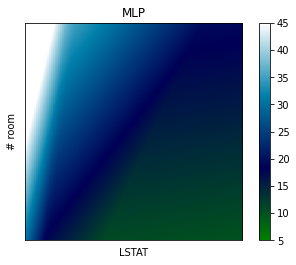

(eval) Epoch 71's' avg loss: 93.28
(eval) Epoch 71's' avg loss: 328.11
(eval) Epoch 72's' avg loss: 102.89
(eval) Epoch 72's' avg loss: 338.52
(eval) Epoch 73's' avg loss: 119.29
(eval) Epoch 73's' avg loss: 374.09
(eval) Epoch 74's' avg loss: 91.49
(eval) Epoch 74's' avg loss: 325.00
(eval) Epoch 75's' avg loss: 89.93
(eval) Epoch 75's' avg loss: 324.81
(training) Epoch 76's' avg loss: 2372.41


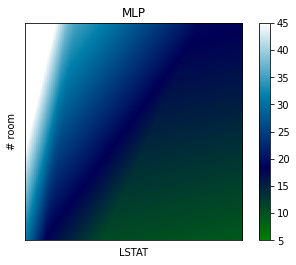

(eval) Epoch 76's' avg loss: 91.13
(eval) Epoch 76's' avg loss: 332.54
(eval) Epoch 77's' avg loss: 89.74
(eval) Epoch 77's' avg loss: 325.10
(eval) Epoch 78's' avg loss: 98.77
(eval) Epoch 78's' avg loss: 340.32
(eval) Epoch 79's' avg loss: 90.85
(eval) Epoch 79's' avg loss: 327.24
(eval) Epoch 80's' avg loss: 95.80
(eval) Epoch 80's' avg loss: 334.34
(training) Epoch 81's' avg loss: 2318.35


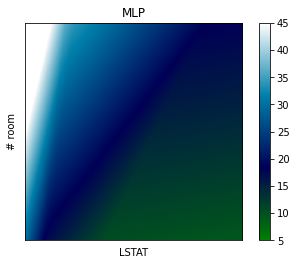

(eval) Epoch 81's' avg loss: 87.89
(eval) Epoch 81's' avg loss: 324.78
(eval) Epoch 82's' avg loss: 106.92
(eval) Epoch 82's' avg loss: 347.41
(eval) Epoch 83's' avg loss: 90.24
(eval) Epoch 83's' avg loss: 325.39
(eval) Epoch 84's' avg loss: 85.75
(eval) Epoch 84's' avg loss: 329.14
(eval) Epoch 85's' avg loss: 95.14
(eval) Epoch 85's' avg loss: 328.56
(training) Epoch 86's' avg loss: 2373.85


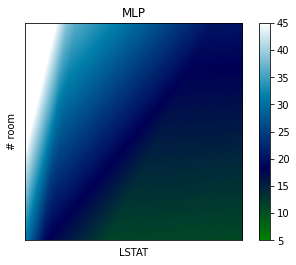

(eval) Epoch 86's' avg loss: 106.18
(eval) Epoch 86's' avg loss: 356.80
(eval) Epoch 87's' avg loss: 86.47
(eval) Epoch 87's' avg loss: 327.38
(eval) Epoch 88's' avg loss: 88.06
(eval) Epoch 88's' avg loss: 325.78
(eval) Epoch 89's' avg loss: 97.43
(eval) Epoch 89's' avg loss: 330.19
(eval) Epoch 90's' avg loss: 99.49
(eval) Epoch 90's' avg loss: 335.76
(training) Epoch 91's' avg loss: 2322.09


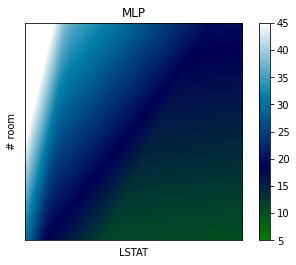

(eval) Epoch 91's' avg loss: 99.79
(eval) Epoch 91's' avg loss: 337.41
(eval) Epoch 92's' avg loss: 86.61
(eval) Epoch 92's' avg loss: 326.45
(eval) Epoch 93's' avg loss: 93.89
(eval) Epoch 93's' avg loss: 328.04
(eval) Epoch 94's' avg loss: 118.04
(eval) Epoch 94's' avg loss: 369.46
(eval) Epoch 95's' avg loss: 87.29
(eval) Epoch 95's' avg loss: 325.94
(training) Epoch 96's' avg loss: 2427.21


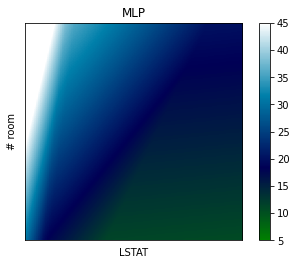

(eval) Epoch 96's' avg loss: 103.02
(eval) Epoch 96's' avg loss: 342.81
(eval) Epoch 97's' avg loss: 83.48
(eval) Epoch 97's' avg loss: 328.89
(eval) Epoch 98's' avg loss: 95.61
(eval) Epoch 98's' avg loss: 329.08
(eval) Epoch 99's' avg loss: 84.28
(eval) Epoch 99's' avg loss: 330.69
(eval) Epoch 100's' avg loss: 101.33
(eval) Epoch 100's' avg loss: 338.27


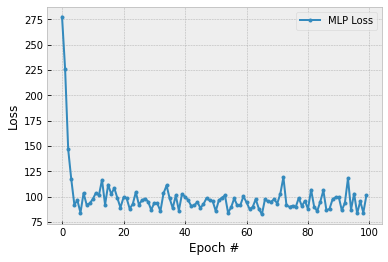

In [10]:

# sequential model
fc_1 = torch.nn.Linear(2, 4)
fc_2 = torch.nn.Linear(4, 16)
fc_3 = torch.nn.Linear(16, 1)
relu = torch.nn.ReLU()
layers = [fc_1, relu, fc_2, relu, fc_3]
model = torch.nn.Sequential(*layers)

# parameter count check
count = 0
for parameter in model.parameters():
    count+=1
    print(parameter.size())
    print(parameter.dtype)
    print(parameter)
    print('\n')
print(count)

opt = torch.optim.Adam(model.parameters(), lr=0.003)
loss = torch.nn.MSELoss()


# model & traning

for epoch in range(epochs):
    step_num_mlp+=1
    _loss = 0
    
    for xs, ys in data_loader:
        # print(xs.dtype)
        # print(ys.dtype)
        opt.zero_grad()

        loss_evaluated = loss(model(xs), ys)
        loss_evaluated.backward()
        _loss += loss_evaluated

        opt.step()
    
    # accuracy = test(model, X[train_sample:], y[train_sample:], logits=True)
    # acc.append(accuracy)

    if epoch %5 == 0:
        # avg loss for every epoch
        print(f"(training) Epoch {step_num_mlp}'s' avg loss: {_loss:.2f}")
        gen_heatmap(model, name='MLP')
    eval_model(model, _data_loader=test_loader, epoch_num=step_num_mlp, history_list=eval_loss_history)
    eval_model(model, _data_loader=data_loader, epoch_num=step_num_mlp, history_list=train_loss_history)

# plot training result
# plot eval avg loss for each epoch

plt.style.use("bmh")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(eval_loss_history, '.-', label="MLP Loss")
# ax.plot(*, '.-', label="Backprop")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch #")
ax.legend()

plt.show()

Hybrid Multi layer perceptron
=======================================

![title](img/regression_hmlp.png)

In [11]:
import pennylane as qml
import numpy as np
import torch
from torch.autograd import Variable

In [12]:
# defining quantum circuit

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=2)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])
    
    qml.RY(weights[0, 0], wires=0)
    qml.RY(weights[0, 1], wires=1)
    qml.RY(weights[0, 2], wires=2)
    qml.RY(weights[0, 3], wires=3)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])

    return [qml.expval(qml.PauliZ(wires=0)), 
            qml.expval(qml.PauliZ(wires=1)),
            qml.expval(qml.PauliZ(wires=2)),
            qml.expval(qml.PauliZ(wires=3))]

In [13]:
import functools
from collections import OrderedDict

# hybrid circuits, sequential model
fc_test = torch.nn.Linear(4, 40, bias=False)
# fc_1 = torch.nn.Linear(4, 4, bias=False)
fc_2 = torch.nn.Linear(40, 1)
relu = torch.nn.ReLU()
torch.nn.init.uniform_(fc_2.weight, a=-50, b=50)

# pennylane cirtuit convertion, to pytorch layer
n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.TorchLayer(qnode, weight_shapes, init_method={'weights': functools.partial(torch.nn.init.uniform_, b=np.pi*0.6)})

# h_layers = [qlayer, fc_1, relu, fc_2]
h_layers = OrderedDict(([
            ('qlayer', qlayer),
            ('fc_test', fc_test),
            ('relu', relu),
            # ('fc_1', fc_1), 
            # ('relu', relu), 
            ('fc_2', fc_2)]))
h_model = torch.nn.Sequential(h_layers)

In [14]:
opt = torch.optim.Adam(h_model.parameters(), lr=0.003)
loss = torch.nn.MSELoss()

In [15]:
# handle input different comparing with MLP, use input as radian

def NormalizeData(data):
    data = np.transpose(data)
    data[0] = (data[0] - np.min(data[0])) / (np.max(data[0]) - np.min(data[0]))
    data[1] = (data[1] - np.min(data[1])) / (np.max(data[1]) - np.min(data[1]))
    return np.transpose(data)

def StandardizeData(data):
    data = np.transpose(data)
    mean = [np.mean(data[0]), np.mean(data[1])]
    std = [np.std(data[0]), np.std(data[1])]
    data[0] = (data[0] - mean[0]) - std[0]
    data[1] = (data[1] - mean[1]) - std[1]
    return np.transpose(data)

def MinMaxScaler(data):
    data = np.transpose(data)
    std = [np.std(data[0]), np.std(data[1])]
    data[0] = std[0] * (np.max(data[0]) - np.min(data[0])) + np.min(data[0])
    data[1] = std[1] * (np.max(data[1]) - np.min(data[1])) + np.min(data[1])
    return np.transpose(data)

def robustScaler(data):
    data = np.transpose(data)
    q1 = [np.quantile(data[0], 0.25), np.quantile(data[1], 0.25)]
    q3 = [np.quantile(data[0], 0.25), np.quantile(data[1], 0.75)]
    data[0] = (data[0]-q1[0])/(q3[0] - q1[0])
    data[1] = (data[1]-q1[1])/(q3[1] - q1[1])
    return np.transpose(data)

def hybrid_dataloader():
    with warnings.catch_warnings(): 
        # You should probably not use this dataset.
        warnings.filterwarnings("ignore")
        X, y = load_boston(return_X_y=True)
        # # to tensor, and only select # numnber of rooms and LSTAT as input X
        X = X[:, [5, 12]]
        X = NormalizeData(X)
        # y = NormalizeData(y)
        # plt.scatter(X[:, 0], X[:, 1], c=y)
        X = torch.tensor(X).float()
        # print(y.dtype)
        y = torch.tensor(y.reshape((total_sample, 1))).float()
        # print(y.dtype)

        return [torch.utils.data.DataLoader(
        list(zip(X, y))[:train_sample], batch_size=batch_size, shuffle=True, drop_last=True
        ),
               torch.utils.data.DataLoader(
        list(zip(X, y))[train_sample:], batch_size=batch_size, shuffle=True, drop_last=True
        )]
# print(y.dtype)
# print(torch.isnan(y).any())

In [16]:
test_model = torch.nn.Sequential(qlayer)
test_model(X[:3])

tensor([[ 0.2629,  0.1655,  0.5959,  0.0681],
        [ 0.2719, -0.6213,  0.5558, -0.2558],
        [ 0.1702, -0.2556,  0.6380, -0.1052]], grad_fn=<StackBackward0>)

In [17]:
def print_para(_model):
    para = []
    for parameter in _model.parameters():
        para = parameter.data
    return para

In [18]:
_heatmap = []

(training, BCELoss) Epoch 1's' avg loss: 17553.03


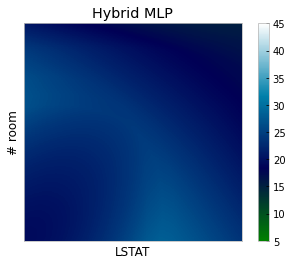

(eval) Epoch 1's' avg loss: 197.47
(eval) Epoch 2's' avg loss: 192.40
(eval) Epoch 3's' avg loss: 126.62
(eval) Epoch 4's' avg loss: 214.86
(eval) Epoch 5's' avg loss: 99.62
(training, BCELoss) Epoch 6's' avg loss: 2349.41


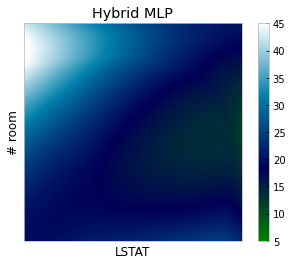

(eval) Epoch 6's' avg loss: 110.55
(eval) Epoch 7's' avg loss: 80.06
(eval) Epoch 8's' avg loss: 85.90
(eval) Epoch 9's' avg loss: 92.80
(eval) Epoch 10's' avg loss: 121.93
(training, BCELoss) Epoch 11's' avg loss: 2341.38


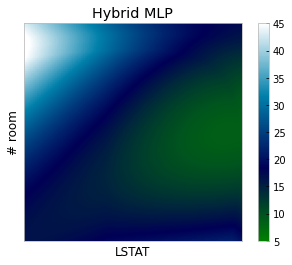

(eval) Epoch 11's' avg loss: 77.78
(eval) Epoch 12's' avg loss: 82.05
(eval) Epoch 13's' avg loss: 116.50
(eval) Epoch 14's' avg loss: 95.49
(eval) Epoch 15's' avg loss: 82.56
(training, BCELoss) Epoch 16's' avg loss: 2367.11


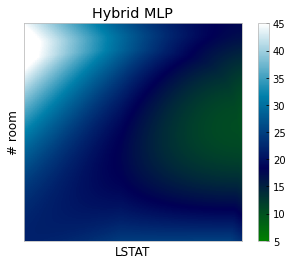

(eval) Epoch 16's' avg loss: 103.98
(eval) Epoch 17's' avg loss: 89.09
(eval) Epoch 18's' avg loss: 90.87
(eval) Epoch 19's' avg loss: 82.56
(eval) Epoch 20's' avg loss: 82.11
(training, BCELoss) Epoch 21's' avg loss: 2278.35


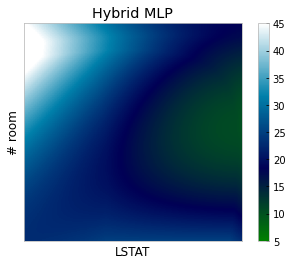

(eval) Epoch 21's' avg loss: 115.43
(eval) Epoch 22's' avg loss: 120.99
(eval) Epoch 23's' avg loss: 79.34
(eval) Epoch 24's' avg loss: 83.37
(eval) Epoch 25's' avg loss: 95.17
(training, BCELoss) Epoch 26's' avg loss: 2355.25


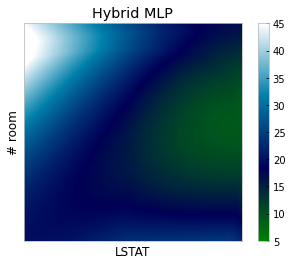

(eval) Epoch 26's' avg loss: 87.49
(eval) Epoch 27's' avg loss: 78.75
(eval) Epoch 28's' avg loss: 132.53
(eval) Epoch 29's' avg loss: 97.83
(eval) Epoch 30's' avg loss: 82.14
(training, BCELoss) Epoch 31's' avg loss: 2293.03


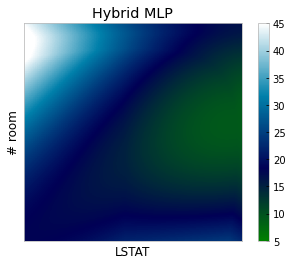

(eval) Epoch 31's' avg loss: 83.14
(eval) Epoch 32's' avg loss: 98.35
(eval) Epoch 33's' avg loss: 110.47
(eval) Epoch 34's' avg loss: 107.44
(eval) Epoch 35's' avg loss: 107.23
(training, BCELoss) Epoch 36's' avg loss: 2243.82


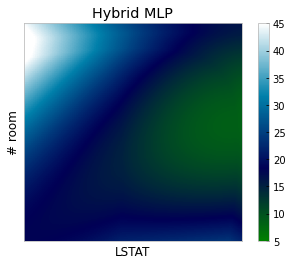

(eval) Epoch 36's' avg loss: 79.67
(eval) Epoch 37's' avg loss: 91.96
(eval) Epoch 38's' avg loss: 80.96
(eval) Epoch 39's' avg loss: 132.75
(eval) Epoch 40's' avg loss: 85.71
(training, BCELoss) Epoch 41's' avg loss: 2282.16


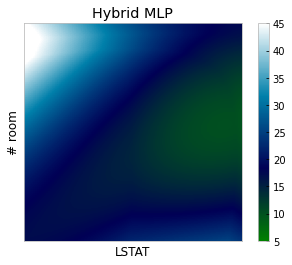

(eval) Epoch 41's' avg loss: 86.59
(eval) Epoch 42's' avg loss: 98.16
(eval) Epoch 43's' avg loss: 88.42
(eval) Epoch 44's' avg loss: 83.60
(eval) Epoch 45's' avg loss: 85.93
(training, BCELoss) Epoch 46's' avg loss: 2304.63


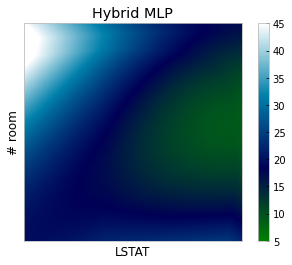

(eval) Epoch 46's' avg loss: 84.98
(eval) Epoch 47's' avg loss: 90.54
(eval) Epoch 48's' avg loss: 78.33
(eval) Epoch 49's' avg loss: 77.29
(eval) Epoch 50's' avg loss: 129.59
(training, BCELoss) Epoch 51's' avg loss: 2300.82


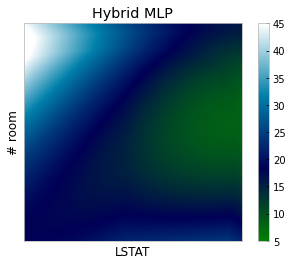

(eval) Epoch 51's' avg loss: 80.37
(eval) Epoch 52's' avg loss: 78.60
(eval) Epoch 53's' avg loss: 77.73
(eval) Epoch 54's' avg loss: 84.55
(eval) Epoch 55's' avg loss: 79.76
(training, BCELoss) Epoch 56's' avg loss: 2448.62


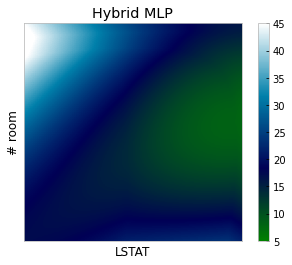

(eval) Epoch 56's' avg loss: 79.43
(eval) Epoch 57's' avg loss: 81.74
(eval) Epoch 58's' avg loss: 85.06
(eval) Epoch 59's' avg loss: 81.03
(eval) Epoch 60's' avg loss: 82.92
(training, BCELoss) Epoch 61's' avg loss: 2291.27


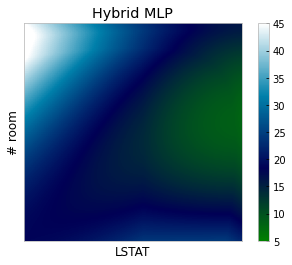

(eval) Epoch 61's' avg loss: 81.74
(eval) Epoch 62's' avg loss: 84.39
(eval) Epoch 63's' avg loss: 82.77
(eval) Epoch 64's' avg loss: 138.89
(eval) Epoch 65's' avg loss: 90.24
(training, BCELoss) Epoch 66's' avg loss: 2321.97


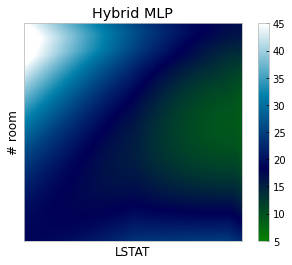

(eval) Epoch 66's' avg loss: 87.80
(eval) Epoch 67's' avg loss: 100.95
(eval) Epoch 68's' avg loss: 76.61
(eval) Epoch 69's' avg loss: 94.80
(eval) Epoch 70's' avg loss: 95.58
(training, BCELoss) Epoch 71's' avg loss: 2392.62


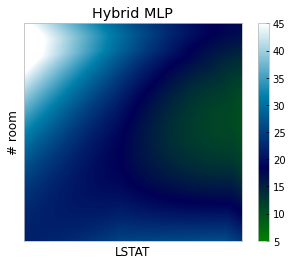

(eval) Epoch 71's' avg loss: 110.39
(eval) Epoch 72's' avg loss: 86.72
(eval) Epoch 73's' avg loss: 81.07
(eval) Epoch 74's' avg loss: 86.56
(eval) Epoch 75's' avg loss: 75.79
(training, BCELoss) Epoch 76's' avg loss: 2219.47


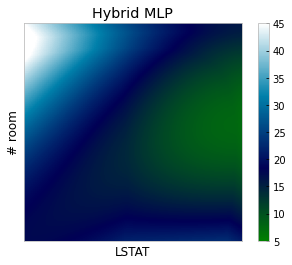

(eval) Epoch 76's' avg loss: 78.64
(eval) Epoch 77's' avg loss: 94.18
(eval) Epoch 78's' avg loss: 79.60
(eval) Epoch 79's' avg loss: 91.22
(eval) Epoch 80's' avg loss: 99.97
(training, BCELoss) Epoch 81's' avg loss: 2471.97


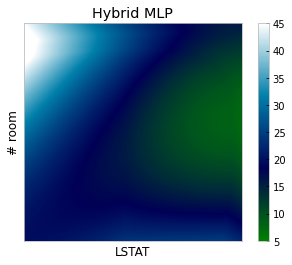

(eval) Epoch 81's' avg loss: 81.74
(eval) Epoch 82's' avg loss: 92.41
(eval) Epoch 83's' avg loss: 80.50
(eval) Epoch 84's' avg loss: 94.04
(eval) Epoch 85's' avg loss: 79.07
(training, BCELoss) Epoch 86's' avg loss: 2252.06


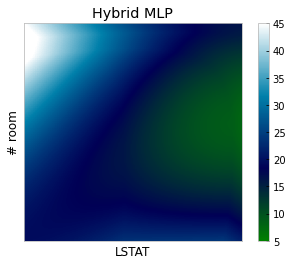

(eval) Epoch 86's' avg loss: 86.18
(eval) Epoch 87's' avg loss: 115.24
(eval) Epoch 88's' avg loss: 80.25
(eval) Epoch 89's' avg loss: 77.09
(eval) Epoch 90's' avg loss: 113.65
(training, BCELoss) Epoch 91's' avg loss: 2203.63


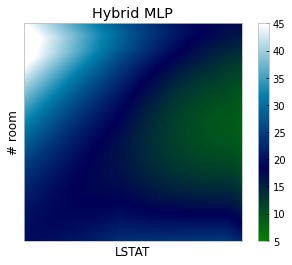

(eval) Epoch 91's' avg loss: 87.65
(eval) Epoch 92's' avg loss: 88.38
(eval) Epoch 93's' avg loss: 78.53
(eval) Epoch 94's' avg loss: 80.15
(eval) Epoch 95's' avg loss: 82.64
(training, BCELoss) Epoch 96's' avg loss: 2398.32


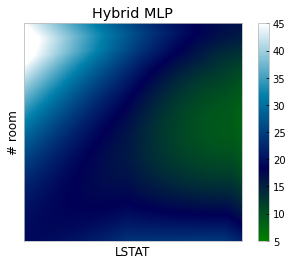

(eval) Epoch 96's' avg loss: 85.96
(eval) Epoch 97's' avg loss: 83.41
(eval) Epoch 98's' avg loss: 92.07
(eval) Epoch 99's' avg loss: 103.43
(eval) Epoch 100's' avg loss: 77.89


In [19]:
# model & traning

flag = True

def quantum_state(state):
    for param in h_model.qlayer.parameters():
        param.requires_grad =state

def mlp_state(state):
    # for param in h_model.fc_1.parameters():
    #     param.requires_grad =state
    for param in h_model.fc_2.parameters():
        param.requires_grad =state
        

# mlp_state(not flag)

for epoch in range(epochs):
    step_num_hmlp+=1
    _loss = 0
    
    for xs, ys in hybrid_dataloader()[0]:
        xs *= np.pi/2
        
        opt.zero_grad()

        loss_evaluated = loss(h_model(xs), ys)
        loss_evaluated.backward()
        _loss += loss_evaluated
            
        # if torch.isnan(loss_evaluated).any():
        #     print(h_model(xs), ys)
        #     print('\n')
        #     aaa

        opt.step()

#     if flag < 10:
#         # quantum_state(not bool(flag))
#         # mlp_state(bool(flag))
        
#         flag +=1
#     else:
#         quantum_state(not bool(flag))
#         mlp_state(bool(flag))
#         flag =-1
        
    if epoch %5 == 0:
        # avg loss for every epoch
        print(f"(training, BCELoss) Epoch {step_num_hmlp}'s' avg loss: {_loss:.2f}")
        gen_heatmap(h_model, name='Hybrid MLP')
    eval_model(h_model, _data_loader=hybrid_dataloader()[1], scale=np.pi/2, epoch_num=step_num_hmlp, history_list=h_eval_loss_history)
    # eval_model(h_model, _data_loader=hybrid_dataloader()[0], scale=np.pi/2, epoch_num=step_num_hmlp, history_list=h_train_loss_history)
# _heatmap.append(gen_heatmap(h_model, name='Hybrid MLP'))
# a = gen_heatmap(h_model, name='Hybrid MLP')

Comparision
=======================================

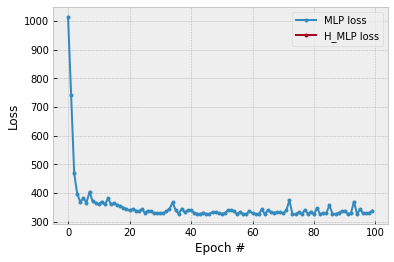

In [20]:
# plot benchmark comparing between mlp and hmlp

plt.style.use("bmh")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_ylabel("Loss")
ax.set_xlabel("Epoch #")

ax.plot(train_loss_history, '.-', label="MLP loss")
ax.plot(h_train_loss_history, '.-', label="H_MLP loss")
# ax.plot(*, '.-', label="Backprop")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch #")

ax.legend()
plt.show()

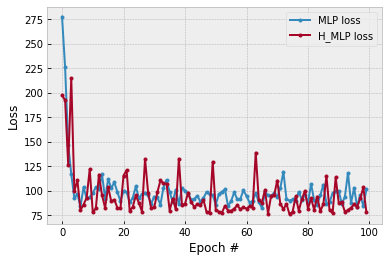

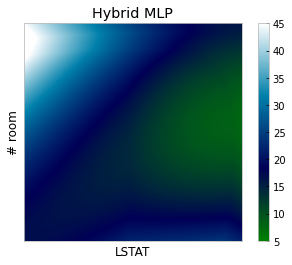

In [21]:
# plot benchmark comparing between mlp and hmlp

plt.style.use("bmh")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_ylabel("Loss")
ax.set_xlabel("Epoch #")

ax.plot(eval_loss_history, '.-', label="MLP loss")
ax.plot(h_eval_loss_history, '.-', label="H_MLP loss")
# ax.plot(*, '.-', label="Backprop")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch #")

ax.legend()
plt.show()

# gen_heatmap(model, name='MLP')
a = gen_heatmap(h_model, name='Hybrid MLP')